# CS178 HW 1

#### Malav Pandya
Student ID: 91044866

## Problem 1: Python & Data Exploration

In this problem, we will explore some basic statistics and visualizations of an example data set. First, download the zip file for Homework 1, which contains some source code (the mltools directory) and the Fisher iris data set, and load the latter into Python:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns

#### (a) Use X.shape[1] to get the number of features, and X.shape[0] to get the number of data points.

In [2]:
print  (X.shape[1])     #4 features
print  (X.shape[0])     #148 Data points

4
148


#### (b) For each feature, plot a histogram ("plt.hist") of the data values

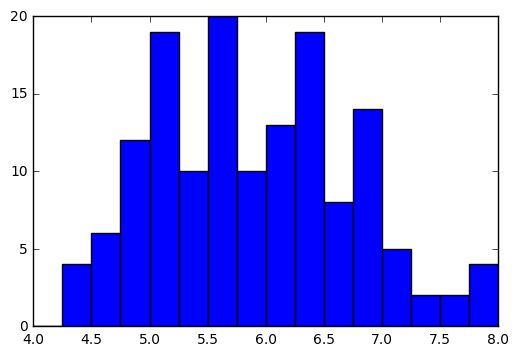

In [3]:
X1 = X[:,0] # extract first feature
Bins = np.linspace(4,8,17) # use explicit bin locations
plt.hist( X1, bins=Bins ); # generate the plot 

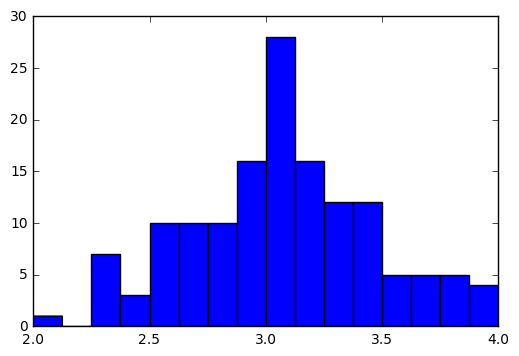

In [4]:
X2 = X[:,1] # extract first feature
Bins = np.linspace(2,4,17) # use explicit bin locations
plt.hist( X2, bins=Bins ); # generate the plot 

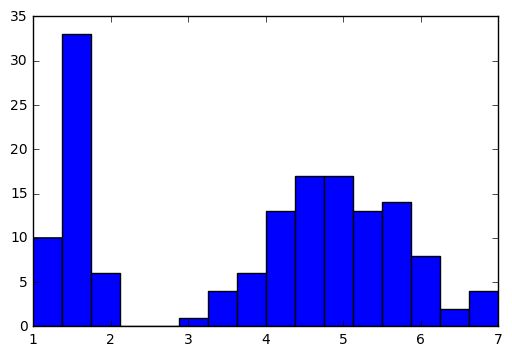

In [5]:
X3 = X[:,2] # extract first feature
Bins = np.linspace(1,7,17) # use explicit bin locations
plt.hist( X3, bins=Bins ); # generate the plot 

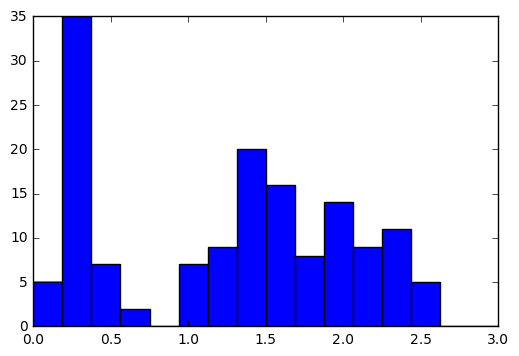

In [6]:
X4 = X[:,3] # extract first feature
Bins = np.linspace(0,3,17) # use explicit bin locations
plt.hist( X4, bins=Bins ); # generate the plot

#### (c) Compute the mean & standard deviation of the data points for each feature (np.mean, np.std)

In [7]:
print (np.mean(X, axis=0)) # compute mean of each feature

[ 5.90010376  3.09893092  3.81955484  1.25255548]


In [8]:
print (np.std(X, axis=0)) #compute standard deviation of each feature 

[ 0.83340207  0.43629184  1.75405711  0.75877246]


#### (d) For each pair of features (1,2), (1,3), and (1,4), plot a scatterplot (see "plt.plot" or "plt.scatter") of the feature values, colored according to their target value (class). (For example, plot all data points with y = 0 as blue, y = 1 as green, etc.)

##### Features (1,2):

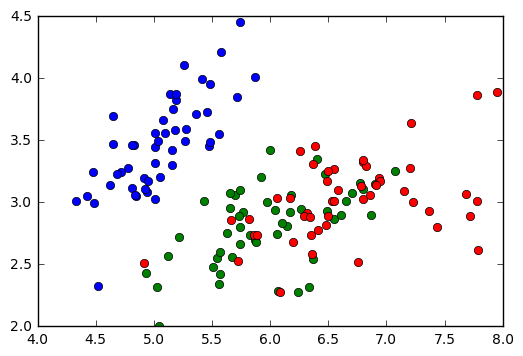

In [9]:
colors = ['b','g','r']
for c in np.unique(Y):
 plt.plot( X[Y==c,0], X[Y==c,1], 'o', color=colors[int(c)] )

##### Features(1,3):

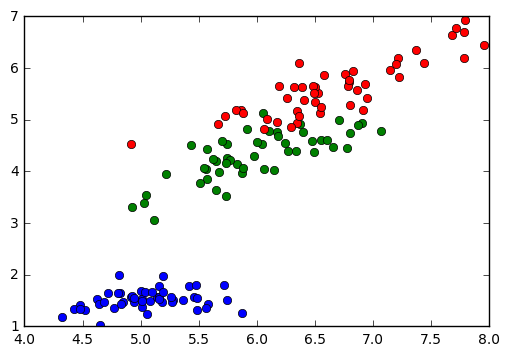

In [10]:
colors = ['b','g','r']
for c in np.unique(Y):
 plt.plot( X[Y==c,0], X[Y==c,2], 'o', color=colors[int(c)] )

##### Features(1,4):

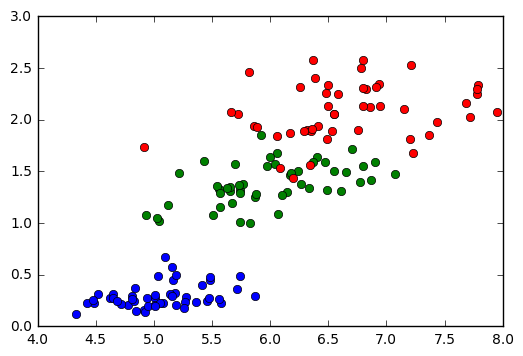

In [11]:
colors = ['b','g','r']
for c in np.unique(Y):
 plt.plot( X[Y==c,0], X[Y==c,3], 'o', color=colors[int(c)] )

## Problem 2: kNN predictions

#### (a) Modify the code listed above to use only the first two features of X (e.g., let X be only the first two columns of iris, instead of the first four), and visualize (plot) the classication boundary for varying values of K = [1, 5, 10, 50] using plotClassify2D.

In [12]:
X = iris[:,0:-3];
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some pathological way,
# as the Iris data are)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/test

##### For K = 1:

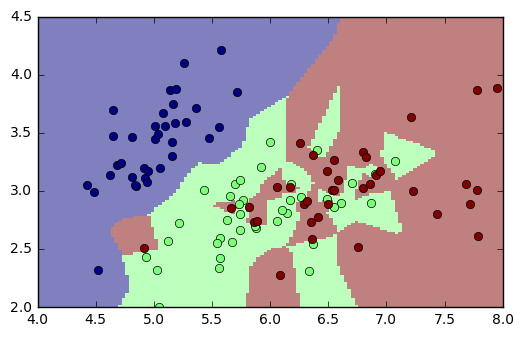

In [13]:
K = 1 #for nearest neighbor prediction

knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xte
ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)

##### For K = 5:

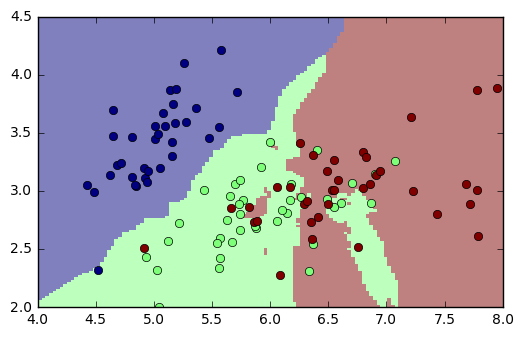

In [14]:
K = 5 #for nearest neighbor prediction

knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xte
ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)

##### For K = 10:

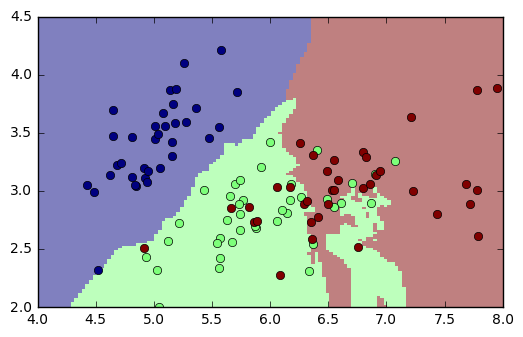

In [15]:
K = 10 #for nearest neighbor prediction

knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xte
ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)

##### For K = 50:

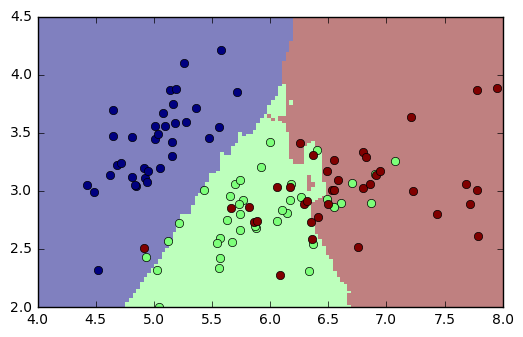

In [16]:
K = 50 #for nearest neighbor prediction

knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xte
ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)

#### (b) Again using only the first two features, compute the error rate (number of misclassications) on both the training and validation data as a function of K = [1, 2, 5, 10, 50, 100, 200]. You can do this most easily with a for-loop:

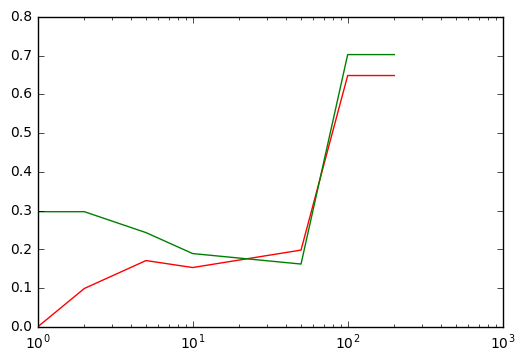

In [17]:
errTrain = [0] * 7;

#on training data

K=[1,2,5,10,50,100,200];
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k) # TODO: complete code to train model
    Yhat = learner.predict(Xtr) # TODO: complete code to predict results on training data
    err = 0
    for j in range(0,len(Yhat)):
        err += 1 if (Yhat[j] != Ytr[j]) else 0 
    fracterr = err/(len(Yhat))                 
    errTrain[i] = fracterr 

plt.semilogx(K, errTrain, color = 'r') #TODO: " " to average and plot results on semi-log scale


#on testing data

K=[1,2,5,10,50,100,200];
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k) # TODO: complete code to train model
    Yhat = learner.predict(Xva) # TODO: complete code to predict results on training data
    err = 0
    for j in range(0,len(Yhat)):
        err += 1 if (Yhat[j] != Yva[j]) else 0 
    fracterr = err/(len(Yhat))                 
    errTrain[i] = fracterr 

plt.semilogx(K, errTrain, color = 'g'); #TODO: " " to average and plot results on semi-log scale

From the graph above, I would recommend K = 50 because of its low error rate, especially with the testing(validation) data. 

## Problem 3: Naïve Bayes Classiers

#### (a) 

$
P(y = 1) = 0.4 \\\
P(y = -1) = 0.6 \\\
P(x_1 = 1 \rvert y = 1) = 0.75 \\\
P(x_1 = 0 \rvert y = 1) = 0.25 \\\
P(x_1 = 1 \rvert y = -1) = 0.5 \\\
P(x_1 = 0 \rvert y = -1) = 0.5 \\\
P(x_2 = 1 \rvert y = 1) = 0\\\
P(x_2 = 0 \rvert y = 1) = 1\\\
P(x_2 = 1 \rvert y = -1) = 0.83\\\
P(x_2 = 0 \rvert y = -1) = 0.17\\\
P(x_3 = 1 \rvert y = 1) = 0.75\\\
P(x_3 = 0 \rvert y = 1) = 0.25\\\
P(x_3 = 1 \rvert y = -1) = 0.67\\\
P(x_3 = 0 \rvert y = -1) = 0.33\\\
P(x_4 = 1 \rvert y = 1) = 0.5\\\
P(x_4 = 0 \rvert y = 1) = 0.5\\\
P(x_4 = 1 \rvert y = -1) = 0.83\\\
P(x_4 = 0 \rvert y = -1) = 0.17\\\
P(x_5 = 1 \rvert y = 1) = 0.25\\\
P(x_5 = 0 \rvert y = 1) = 0.75\\\
P(x_5 = 1 \rvert y = -1) = 0.33\\\
P(x_5 = 0 \rvert y = -1) = 0.67\\\
$

#### (b)

##### For x = (0 0 0 0 0):

$
P(y \rvert x_1 = 0, x_2 = 0, x_3 = 0, x_4 = 0, x_5 = 0) = argmax_y P(x_1 = 0,..., x_5 = 0\rvert y) P(y)\\\
\\\
P(y = 1 \rvert x_1 = 0, x_2 = 0, x_3 = 0, x_4 = 0, x_5 = 0) = \\\ P(y = 1)P(x_1 = 0\rvert y = 1)...P(x_5 = 0 \rvert P(y = 1)
                                                   = (0.4)(0.25)(1)(0.25)(0.5)(0.75) = 0.0094\\\
\\\
P(y = -1 \rvert x_1 = 0, x_2 = 0, x_3 = 0, x_4 = 0, x_5 = 0) = \\\
P(y = -1)P(x_1 = 0\rvert y = -1)...P(x_5 = 0 \rvert P(y = -1)\\\ 
                                                    = (0.6)(0.5)(0.17)(0.33)(0.17)(0.67) = 0.0019\\\
\\\
0.0094 > 0.0019\\\
Predict: y = 1
$

##### For x = (1 1 0 1 0):

$
P(y \rvert x_1 = 1, x_2 = 1, x_3 = 0, x_4 = 1, x_5 = 0) = argmax_y P(x_1 = 1, x_2 = 1, x_3 = 0, x_4 = 1, x_5 = 0\rvert y) P(y)\\\
\\\
P(y = 1 \rvert x_1 = 1, x_2 = 1, x_3 = 0, x_4 = 1, x_5 = 0) = \\\
P(y = 1)P(x_1 = 1\rvert y = 1)P(x_2 = 1\rvert y = 1)P(x_3 = 0\rvert y = 1)P(x_4 = 1\rvert y = 1)P(x_5 = 0 \rvert P(y = 1)\\\
                                                   = (0.4)(0.75)(0)(0.25)(0.5)(0.75) = 0\\\
                                                   \\\
P(y = -1 \rvert x_1 = 1, x_2 = 1, x_3 = 0, x_4 = 1, x_5 = 0) = \\\ 
P(y = -1)P(x_1 = 1\rvert y = -1)P(x_2 = 1\rvert y = -1)
                                            P(x_3 = 0\rvert y = -1)P(x_4 = 1\rvert y = -1)P(x_5 = 0 \rvert P(y = -1)\\\
                                                    = (0.6)(0.5)(0.83)(0.33)(0.83)(0.83) = 0.057\\\
\\\
0 < 0.057\\\
Predict: y = -1
$

#### (c) Compute the posterior probability that y = +1 given the observation x = (1 1 0 1 0).

$
P(y = 1 \rvert x_1 = 1, x_2 = 1, x_3 = 0, x_4 = 1, x_5 = 0) = \\\
\\\
\frac{P(y = 1)P(x_1 = 1\rvert y = 1)P(x_2 = 1\rvert y = 1)P(x_3 = 0\rvert y = 1)P(x_4 = 1\rvert y = 1)P(x_5 = 0 \rvert P(y = 1)}{P(x_1 = 1)P(x_2 = 1)P(x_3 = 0)P(x_4 = 1)P(x_5 = 0)}
$

$
P(y = 1 \rvert x_1 = 1, x_2 = 1, x_3 = 0, x_4 = 1, x_5 = 0) = \frac{0}{P(x_1 = 1)P(x_2 = 1)P(x_3 = 0)P(x_4 = 1)P(x_5 = 0)}
$

$
P(y = 1 \rvert x_1 = 1, x_2 = 1, x_3 = 0, x_4 = 1, x_5 = 0) = 0
$

#### (d) Why should we probably not use a "joint" Bayes classier (using the joint probability of the features x, as opposed to a naive Bayes classier) for these data?

A "joint" Bayes classifier would not be appropriate since we are asumming that the features are conditionally independent of each other. It would be ineffective to compute joint probabilities. If we did, P(x|y) = 2^5 = 32 - 1 = 31 parameters. So, certain combinations would be impossible and the model will not adjust well to new data. 

#### (e) Suppose that, before we make our predictions, we lose access to my address book, so that we cannot tell whether the email author is known. Should we re-train the model, and if so, how? (e.g.: how does the model, and its parameters, change in this new situation?) Hint: what will the naïve Bayes model over only features x2 . . . x5 look like, and what will its parameters be?

Yes, we should retrain this model by excluding P(x1 | y) from it. We assume the features are conditionally independent so everything else will remain same. The new model will look like:

$$
 argmax_y P(x_2, x_3, x_4, x_5\rvert y) P(y)
$$